#  Exploratory data analysis 
##### BY: FLAVIUS ALBULESCU, ANTONIA TAUS AND HORIA MARCU

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import plotly.graph_objects as go

In [66]:
file_name = 'E:\PythonRes\Datasets\Proiecte actuale\Tema10 - Beijing PM2.5 Data\PRSA_data_2010.1.1-2014.12.31 - copy.csv'
df_Beijing = pd.read_csv ( file_name)

In [67]:
df_Beijing.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd  NW  SE  NE  cv  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1   0   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   1   0   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   1   0   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   1   0   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW   1   0   0   0   

     Iws  Is  Ir  
0   1.79   0   0  
1   4.92   0   0  
2   6.71   0   0  
3   9.84   0   0  
4  12.97   0   0

In [68]:
df_Beijing.shape

(43824, 17)

In [69]:
print("tipuri date", df_Beijing.dtypes)

tipuri date No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
NW         int64
SE         int64
NE         int64
cv         int64
Iws      float64
Is         int64
Ir         int64
dtype: object


In [70]:
display(df_Beijing.describe())

No          year         month           day          hour  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean   21912.500000   2012.000000      6.523549     15.727820     11.500000   
std    12651.043435      1.413842      3.448572      8.799425      6.922266   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    10956.750000   2011.000000      4.000000      8.000000      5.750000   
50%    21912.500000   2012.000000      7.000000     16.000000     11.500000   
75%    32868.250000   2013.000000     10.000000     23.000000     17.250000   
max    43824.000000   2014.000000     12.000000     31.000000     23.000000   

              pm2.5          DEWP          TEMP          PRES            NW  \
count  41757.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      98.613215      1.817246     12.448521   1016.447654      0.322814   
std       92.050387     14.433440     12.198613     10.268698      0.467558   
min        0.000000    -40.000000    -19.000000    991.000000      0.000000   
25%       29.000000    -10.000000      2.000000   1008.000000      0.000000   
50%       72.000000      2.000000     14.000000   1016.000000      0.000000   
75%      137.000000     15.000000     23.000000   1025.000000      1.000000   
max      994.000000     28.000000     42.000000   1046.000000      1.000000   

                 SE            NE            cv           Iws            Is  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean       0.348896      0.000228      0.214198     23.889140      0.052734   
std        0.476626      0.015104      0.410269     50.010635      0.760375   
min        0.000000      0.000000      0.000000      0.450000      0.000000   
25%        0.000000      0.000000      0.000000      1.790000      0.000000   
50%        0.000000      0.000000      0.000000      5.370000      0.000000   
75%        1.000000      0.000000      0.000000     21.910000      0.000000   
max        1.000000      1.000000      1.000000    585.600000     27.000000   

                 Ir  
count  43824.000000  
mean       0.194916  
std        1.415867  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       36.000000

In [93]:
print("raport valori lipsa/ valori bune")

results = []
for c in df_Beijing.columns:
    # filtram cu conditia ca valorile din coloana c sa fie lipsa si returnam numarul de linii
    missing_cnt = df_Beijing[ df_Beijing[c].isna() ].shape[0]  #Intre [] se specifica conditia!!!
    dict_row ={"Column name": c,
                "Missing values": str(missing_cnt),
               "Percentage of good values": round( 100*(1-missing_cnt/df_Beijing.shape[0]),2)}
    results.append(dict_row)

display(pd.DataFrame(results))

raport valori lipsa/ valori bune


Column name Missing values  Percentage of good values
0           No              0                     100.00
1         year              0                     100.00
2        month              0                     100.00
3          day              0                     100.00
4         hour              0                     100.00
5        pm2.5           2067                      95.28
6         DEWP              0                     100.00
7         TEMP              0                     100.00
8         PRES              0                     100.00
9         cbwd              0                     100.00
10          NW              0                     100.00
11          SE              0                     100.00
12          NE              0                     100.00
13          cv              0                     100.00
14         Iws              0                     100.00
15          Is              0                     100.00
16          Ir              0                     100.00

Dropping the columns that have null values (that's 4.72% of the data)

In [94]:
df_B1 = df_Beijing.dropna(subset = ["pm2.5"], inplace = False)

In [95]:
# df_B1 = df_B1[24:].fillna(method="ffill")
# print(df_B1['pm2.5'].isna().sum())

df_B1 = df_B1.dropna(subset = ["pm2.5"], inplace = False)

In [96]:
df_B1.drop(['No'], axis=1)
print(f"There are {df_B1['pm2.5'].isna().sum()} null values left")
df_B1.describe()

There are 0 null values left


No          year         month           day          hour  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean   22279.380104   2012.042771      6.513758     15.685514     11.502311   
std    12658.168415      1.415311      3.454199      8.785539      6.924848   
min       25.000000   2010.000000      1.000000      1.000000      0.000000   
25%    11464.000000   2011.000000      4.000000      8.000000      5.000000   
50%    22435.000000   2012.000000      7.000000     16.000000     12.000000   
75%    33262.000000   2013.000000     10.000000     23.000000     18.000000   
max    43824.000000   2014.000000     12.000000     31.000000     23.000000   

              pm2.5          DEWP          TEMP          PRES            NW  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean      98.613215      1.750174     12.401561   1016.442896      0.323036   
std       92.050387     14.433658     12.175215     10.300733      0.467642   
min        0.000000    -40.000000    -19.000000    991.000000      0.000000   
25%       29.000000    -10.000000      2.000000   1008.000000      0.000000   
50%       72.000000      2.000000     14.000000   1016.000000      0.000000   
75%      137.000000     15.000000     23.000000   1025.000000      1.000000   
max      994.000000     28.000000     42.000000   1046.000000      1.000000   

                 SE            NE            cv           Iws            Is  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean       0.348995      0.000216      0.214192     23.866747      0.055344   
std        0.476658      0.014680      0.410265     49.617495      0.778875   
min        0.000000      0.000000      0.000000      0.450000      0.000000   
25%        0.000000      0.000000      0.000000      1.790000      0.000000   
50%        0.000000      0.000000      0.000000      5.370000      0.000000   
75%        1.000000      0.000000      0.000000     21.910000      0.000000   
max        1.000000      1.000000      1.000000    565.490000     27.000000   

                 Ir  
count  41757.000000  
mean       0.194866  
std        1.418165  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       36.000000

In [97]:
df_B1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    41757 non-null  int64  
 7   TEMP    41757 non-null  float64
 8   PRES    41757 non-null  float64
 9   cbwd    41757 non-null  object 
 10  NW      41757 non-null  int64  
 11  SE      41757 non-null  int64  
 12  NE      41757 non-null  int64  
 13  cv      41757 non-null  int64  
 14  Iws     41757 non-null  float64
 15  Is      41757 non-null  int64  
 16  Ir      41757 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 5.7+ MB


In [98]:
#frecventa_abs = df_B1.groupby('cbwd').count()
frecventa_cumulata = frecventa_abs['year'].cumsum()
print(frecventa_cumulata)

cbwd
NE     4756
NW    18240
SE    32813
cv    41757
Name: year, dtype: int64


In [99]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [100]:
df_B1.drop(['cbwd'],axis=1, inplace=True)

Next we created the time column that contains the year, month, day and hour of each recording

In [101]:
df_B1.insert(loc = 0, column = 'time', value = pd.to_datetime(df_B1[['year', 'month', 'day', 'hour']]))
df_B1.head()

time  No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES  \
24 2010-01-02 00:00:00  25  2010      1    2     0  129.0   -16  -4.0  1020.0   
25 2010-01-02 01:00:00  26  2010      1    2     1  148.0   -15  -4.0  1020.0   
26 2010-01-02 02:00:00  27  2010      1    2     2  159.0   -11  -5.0  1021.0   
27 2010-01-02 03:00:00  28  2010      1    2     3  181.0    -7  -5.0  1022.0   
28 2010-01-02 04:00:00  29  2010      1    2     4  138.0    -7  -5.0  1022.0   

    NW  SE  NE  cv   Iws  Is  Ir  
24   0   1   0   0  1.79   0   0  
25   0   1   0   0  2.68   0   0  
26   0   1   0   0  3.57   0   0  
27   0   1   0   0  5.36   1   0  
28   0   1   0   0  6.25   2   0

Next we've dropped the No, year, month, day and hour columns

In [102]:
df_B1.drop(['No','year','month','day','hour'], axis=1, inplace=True)

In [103]:
df_B1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    41757 non-null  datetime64[ns]
 1   pm2.5   41757 non-null  float64       
 2   DEWP    41757 non-null  int64         
 3   TEMP    41757 non-null  float64       
 4   PRES    41757 non-null  float64       
 5   NW      41757 non-null  int64         
 6   SE      41757 non-null  int64         
 7   NE      41757 non-null  int64         
 8   cv      41757 non-null  int64         
 9   Iws     41757 non-null  float64       
 10  Is      41757 non-null  int64         
 11  Ir      41757 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 4.1 MB


Checking again if there are missing values in the data frame

In [104]:
print("raport valori lipsa/ valori bune")

results = []
for c in df_B1.columns:
    # filtram cu conditia ca valorile din coloana c sa fie lipsa si returnam numarul de linii
    missing_cnt = df_B1[ df_B1[c].isna() ].shape[0]  #Intre [] se specifica conditia!!!
    dict_row ={"Column name": c,
                "Missing values": str(missing_cnt),
               "Percentage of good values": round( 100*(1-missing_cnt/df_B1.shape[0]),2)}
    results.append(dict_row)

display(pd.DataFrame(results))

raport valori lipsa/ valori bune


Column name Missing values  Percentage of good values
0         time              0                      100.0
1        pm2.5              0                      100.0
2         DEWP              0                      100.0
3         TEMP              0                      100.0
4         PRES              0                      100.0
5           NW              0                      100.0
6           SE              0                      100.0
7           NE              0                      100.0
8           cv              0                      100.0
9          Iws              0                      100.0
10          Is              0                      100.0
11          Ir              0                      100.0

In [105]:
print("Data types", df_B1.dtypes)

Data types time     datetime64[ns]
pm2.5           float64
DEWP              int64
TEMP            float64
PRES            float64
NW                int64
SE                int64
NE                int64
cv                int64
Iws             float64
Is                int64
Ir                int64
dtype: object


In [106]:
#pd.to_datetime(df_B1[['year', 'month', 'day', 'hour']])

The mean of the first "window" sized rows of data from the data frame

<AxesSubplot:>

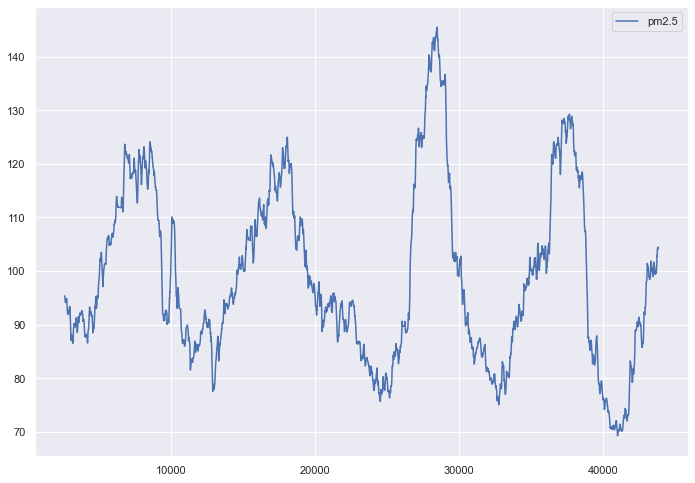

In [126]:
df_mean = df_B1.rolling(window = 2500).mean()
df_mean[['pm2.5']].plot()

In [127]:
df_B1_copy = df_B1.copy()

In [128]:
df_B1_copy = df_B1_copy.drop(['time'], axis=1)

In [129]:
df_B1_copy.describe()

pm2.5          DEWP          TEMP          PRES            NW  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean      98.613215      1.750174     12.401561   1016.442896      0.323036   
std       92.050387     14.433658     12.175215     10.300733      0.467642   
min        0.000000    -40.000000    -19.000000    991.000000      0.000000   
25%       29.000000    -10.000000      2.000000   1008.000000      0.000000   
50%       72.000000      2.000000     14.000000   1016.000000      0.000000   
75%      137.000000     15.000000     23.000000   1025.000000      1.000000   
max      994.000000     28.000000     42.000000   1046.000000      1.000000   

                 SE            NE            cv           Iws            Is  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean       0.348995      0.000216      0.214192     23.866747      0.055344   
std        0.476658      0.014680      0.410265     49.617495      0.778875   
min        0.000000      0.000000      0.000000      0.450000      0.000000   
25%        0.000000      0.000000      0.000000      1.790000      0.000000   
50%        0.000000      0.000000      0.000000      5.370000      0.000000   
75%        1.000000      0.000000      0.000000     21.910000      0.000000   
max        1.000000      1.000000      1.000000    565.490000     27.000000   

                 Ir  
count  41757.000000  
mean       0.194866  
std        1.418165  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       36.000000

## Matricea de corelatie
## Correlation matrix

In [130]:
coloane=['time','pm2.5','DEWP','TEMP','PRES','NW','SE','NE','cv','Iws','Is','Ir']
df_B1[coloane].corr(method = 'spearman')

pm2.5      DEWP      TEMP      PRES        NW        SE        NE  \
pm2.5  1.000000  0.299706  0.010784 -0.141668 -0.365611  0.210683 -0.012472   
DEWP   0.299706  1.000000  0.823268 -0.784039 -0.339019  0.276060 -0.024877   
TEMP   0.010784  0.823268  1.000000 -0.832304 -0.254298  0.312854 -0.025270   
PRES  -0.141668 -0.784039 -0.832304  1.000000  0.233018 -0.250515  0.023551   
NW    -0.365611 -0.339019 -0.254298  0.233018  1.000000 -0.465811 -0.006654   
SE     0.210683  0.276060  0.312854 -0.250515 -0.465811  1.000000 -0.010750   
NE    -0.012472 -0.024877 -0.025270  0.023551 -0.006654 -0.010750  1.000000   
cv     0.181087  0.086742 -0.007987 -0.017869 -0.183148 -0.382262 -0.007666   
Iws   -0.360019 -0.200988  0.012796  0.055906  0.323257  0.217063  0.011540   
Is     0.046978 -0.044068 -0.121424  0.100354 -0.033900  0.053533 -0.001384   
Ir    -0.002359  0.203228  0.096537 -0.131982  0.006096 -0.019696 -0.003060   

             cv       Iws        Is        Ir  
pm2.5  0.181087 -0.360019  0.046978 -0.002359  
DEWP   0.086742 -0.200988 -0.044068  0.203228  
TEMP  -0.007987  0.012796 -0.121424  0.096537  
PRES  -0.017869  0.055906  0.100354 -0.131982  
NW    -0.183148  0.323257 -0.033900  0.006096  
SE    -0.382262  0.217063  0.053533 -0.019696  
NE    -0.007666  0.011540 -0.001384 -0.003060  
cv     1.000000 -0.563128 -0.016779 -0.019066  
Iws   -0.563128  1.000000  0.030426 -0.015657  
Is    -0.016779  0.030426  1.000000 -0.019650  
Ir    -0.019066 -0.015657 -0.019650  1.000000

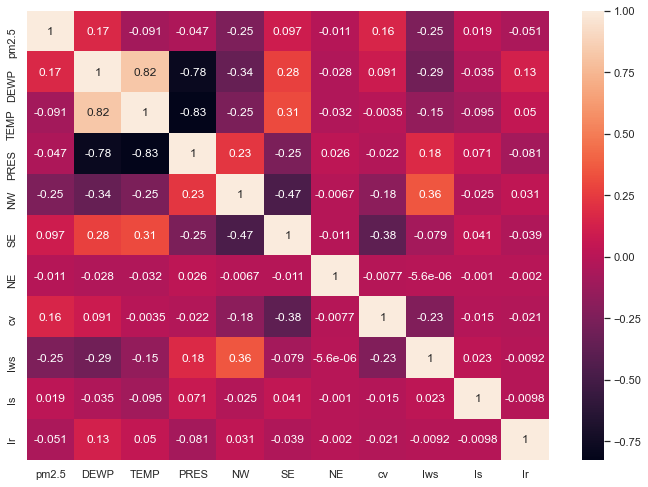

In [131]:
corrMatrix = df_B1_copy.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [132]:
df_test1 = df_B1[['pm2.5','TEMP']]
df_test1

pm2.5  TEMP
24     129.0  -4.0
25     148.0  -4.0
26     159.0  -5.0
27     181.0  -5.0
28     138.0  -5.0
...      ...   ...
43819    8.0  -2.0
43820   10.0  -3.0
43821   10.0  -3.0
43822    8.0  -4.0
43823   12.0  -3.0

[41757 rows x 2 columns]

In [133]:
from scipy.stats import spearmanr
spearmanr(df_test1.TEMP,df_test1['pm2.5'])  

SpearmanrResult(correlation=0.010783648336008554, pvalue=0.027553479079195028)

In [134]:
# înțelegerea puterei relației dintre două variabile
df_test1 = df_B1[['pm2.5','TEMP']].drop_duplicates()
c1 = "pm2.5"
c2 = 'TEMP'
df_test1 = df_test1.sort_values(by = [c1]).reset_index()
df_test1["Rang "+c1] = df_test1.index+1
df_test1 = df_test1.sort_values(by = [c2]).reset_index()
df_test1["Rang "+c2] = df_test1.index+1
df_test1["RangDiff^2"] = (df_test1["Rang "+c1]-df_test1["Rang "+c2])**2
print("Spearmn's rho:")
n = df_test1.shape[0]
1- df_test1["RangDiff^2"].sum()*6/(n*(n**2-1))

Spearmn's rho:


-0.12873693727230995

In [135]:
df_test2 = df_B1[['TEMP','PRES']]
df_test2

TEMP    PRES
24     -4.0  1020.0
25     -4.0  1020.0
26     -5.0  1021.0
27     -5.0  1022.0
28     -5.0  1022.0
...     ...     ...
43819  -2.0  1034.0
43820  -3.0  1034.0
43821  -3.0  1034.0
43822  -4.0  1034.0
43823  -3.0  1034.0

[41757 rows x 2 columns]

In [136]:
from scipy.stats import spearmanr
spearmanr(df_test2.TEMP,df_test2['PRES'])

SpearmanrResult(correlation=-0.8323043435035902, pvalue=0.0)

In [137]:
df_test2 = df_B1[['TEMP','PRES']].drop_duplicates()
c1 = "TEMP"
c2 = 'PRES'
df_test2 = df_test2.sort_values(by = [c1]).reset_index()
df_test2["Rang "+c1] = df_test2.index+1
df_test2 = df_test2.sort_values(by = [c2]).reset_index()
df_test2["Rang "+c2] = df_test2.index+1
df_test2["RangDiff^2"] = (df_test2["Rang "+c1]-df_test2["Rang "+c2])**2
print("Spearmn's rho:")
n = df_test2.shape[0]
1- df_test2["RangDiff^2"].sum()*6/(n*(n**2-1))


Spearmn's rho:


-0.6661456286535421

In [138]:
np.cov(df_B1.DEWP,df_B1['pm2.5'])

array([[ 208.33048691,  227.7570422 ],
       [ 227.7570422 , 8473.27378169]])

# The level of pm2.5 between 2010/01/02 and 2010/02/02 

In [143]:
fig = px.line(df_B1,x='time', y='pm2.5', title="Cantitate de particule poluante mai mici de 2,5 microni", 
              range_x=['2010-01-02 00:00:00','2010-02-02 00:00:00'])
fig.show()

# The level of pm2.5 between 2014/01/02 and 2014/02/02 

In [142]:
fig = px.line(df_B1,x='time', y='pm2.5', title="Cantitate de particule poluante mai mici de 2,5 microni", 
              range_x=['2014-01-02 00:00:00','2014-02-02 00:00:00'])
fig.show()

# Sortare date in functie de pm2.5
# Sorting data by pm2.5

In [38]:
df_B1_copy.sort_values(by =['pm2.5'])

pm2.5  DEWP  TEMP    PRES  NW  SE  NE  cv     Iws  Is  Ir
24034    0.0    -5  20.0  1020.0   1   0   0   0  139.48   0   0
24039    0.0   -10  24.0  1017.0   1   0   0   0  192.68   0   0
24075    1.0     6   9.0  1018.0   0   0   0   0    3.13   0   0
6315     1.0    13  14.0  1015.0   0   0   0   0   48.73   0   9
21402    1.0    -2  29.0   999.0   1   0   0   0   24.15   0   0
...      ...   ...   ...     ...  ..  ..  ..  ..     ...  ..  ..
26590  858.0   -10  -9.0  1024.0   0   0   0   1    0.89   0   0
26588  886.0    -8  -7.0  1023.0   0   0   0   1    1.34   0   0
18050  972.0   -24 -12.0  1032.0   1   0   0   0    8.05   0   0
1057   980.0   -14  -7.0  1029.0   0   0   0   1    0.89   0   0
18049  994.0   -24 -12.0  1032.0   1   0   0   0    4.92   0   0

[41757 rows x 11 columns]

# Boxplot 

In [39]:
fig = px.box(df_B1_copy, y="pm2.5")
fig.show()

In [40]:
jumatate_nr_elem = len(df_B1[(df_B1['pm2.5']>=29) & (df_B1['pm2.5']<=137)])
outliers = len(df_B1[(df_B1['pm2.5']>=299)])
print(f'50% dintre valorile prezente in coloana pm2.5 ({jumatate_nr_elem}) se afla intre q1=29 si q3=137\nNr elementelor de tip outlier este ({outliers})')

50% dintre valorile prezente in coloana pm2.5 (21075) se afla intre q1=29 si q3=137
Nr elementelor de tip outlier este (1797)


# Histograma 
# Histogram

In [41]:
fig = px.histogram(df_B1, x="pm2.5")
fig.show()

# Inregistrari totale pentru fiecare luna din perioada 2010-2014
# The number of records for each month between 2010 to 2014 

In [42]:
fig = px.histogram(df_Beijing, x="month")
fig.update_layout(bargap=0.5)
fig.show()

# The values density 

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

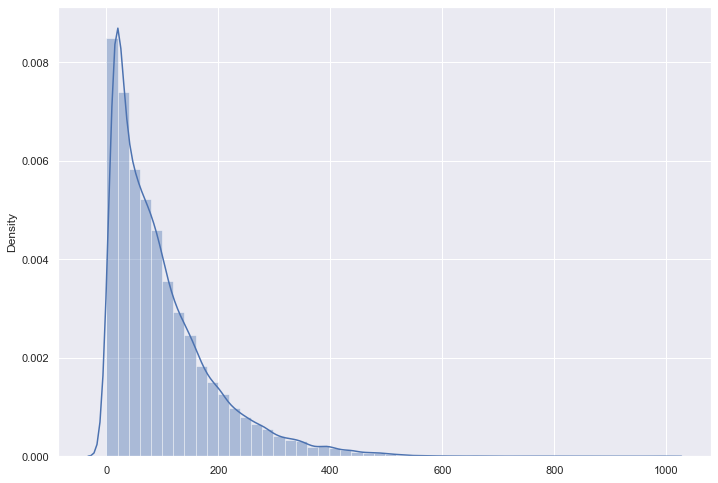

In [145]:
sns.distplot(df_B1[['pm2.5']], bins=50, kde=True, rug=False)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:>

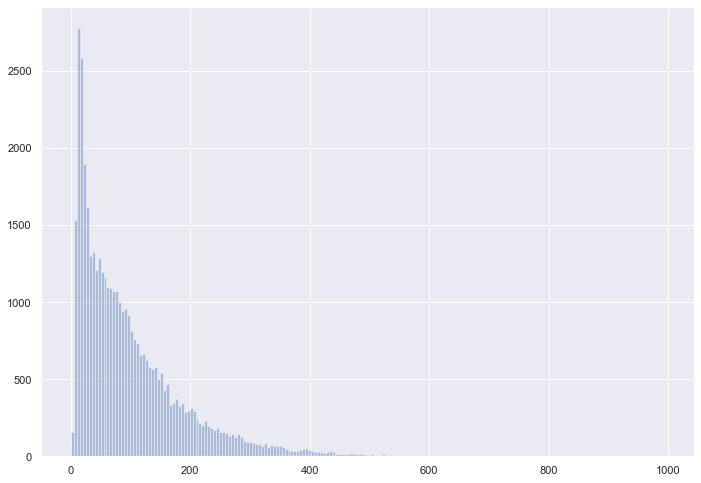

In [45]:
sns.distplot(df_B1[['pm2.5']], bins=200, kde=False, rug=False)

# COVARIANTA
# Covariance

In [46]:
np.cov(df_B1.Ir, df_B1.DEWP)  #merg doar 2 argumente 

array([[  2.0111931 ,   2.56563936],
       [  2.56563936, 208.33048691]])

# pm2.5 average by year

<AxesSubplot:xlabel='an', ylabel='pm2.5'>

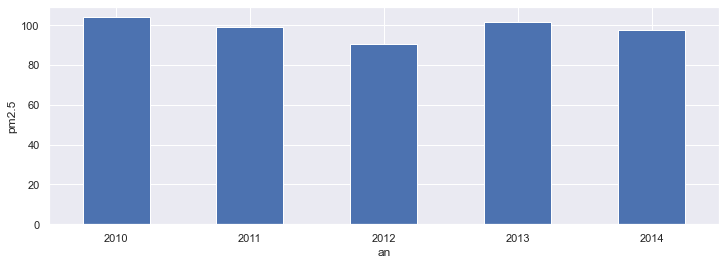

In [47]:
#media pe ani a pm2.5
fig, axs = plt.subplots(figsize=(12, 4))

df=df_B1.groupby(
    [df_B1["time"].dt.year])["pm2.5"].mean().plot(
    kind='bar', rot=0, ax=axs)
plt.xlabel("an");  

plt.ylabel("pm2.5");
df

# pm2.5 average for each month of each year

<AxesSubplot:xlabel='luna si an', ylabel='pm2.5'>

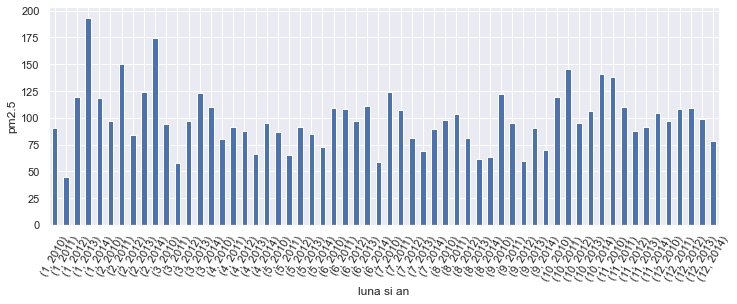

In [48]:
#pe luna si ani

fig, axs = plt.subplots(figsize=(12, 4))

df=df_B1.groupby(
    [df_B1["time"].dt.month,df_B1["time"].dt.year])["pm2.5"].mean().plot(
    kind='bar', rot=0, ax=axs)
plt.xlabel("luna si an");  
plt.xticks(rotation=60)
plt.ylabel("pm2.5");
df

# pm2.5 average for the first month of each year

<AxesSubplot:xlabel='luna si an', ylabel='pm2.5'>

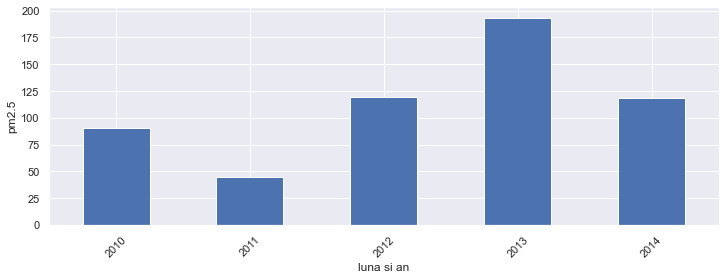

In [155]:
#pe luna si ani (prima luna din fiecare an)

fig, axs = plt.subplots(figsize=(12, 4))
df=df_B1.where(df_B1["time"].dt.month==1)
df=df.groupby(
    [df_B1["time"].dt.year])["pm2.5"].mean().plot(
    kind='bar', rot=0, ax=axs)
plt.xlabel("luna si an");  
plt.xticks(rotation=45)
plt.ylabel("pm2.5");
df

# pm2.5 average for the 12th month of each year

<AxesSubplot:xlabel='luna si an', ylabel='pm2.5'>

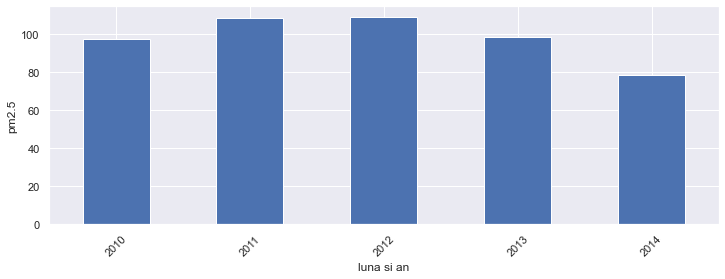

In [151]:
fig, axs = plt.subplots(figsize=(12, 4))
df=df_B1.where(df_B1["time"].dt.month==12)
df=df.groupby(
    [df_B1["time"].dt.year])["pm2.5"].mean().plot(
    kind='bar', rot=0, ax=axs)
plt.xlabel("luna si an");  
plt.xticks(rotation=45)
plt.ylabel("pm2.5");
df

# Average pm2.5 pollution by year

In [156]:
#poluare medie in functie de an
df_sample = df_B1.groupby(df_B1["time"].dt.year)['pm2.5'].agg('mean').reset_index()
df_sample.head(5)

time       pm2.5
0  2010  104.045730
1  2011   99.071340
2  2012   90.545871
3  2013  101.712376
4  2014   97.734557

In [157]:
fig = px.line(df_sample, x = df_sample.time, y = df_sample['pm2.5'], title='Evolutia poluarii')
fig.show()

# The max value for each month 

In [53]:
df_sample = df_B1.groupby(df_B1["time"].dt.month)['pm2.5'].agg('max').reset_index()
df_sample.head(12)

time  pm2.5
0      1  994.0
1      2  980.0
2      3  784.0
3      4  580.0
4      5  320.0
5      6  466.0
6      7  390.0
7      8  360.0
8      9  455.0
9     10  562.0
10    11  569.0
11    12  615.0

In [159]:
fig = px.line(df_sample, x = df_sample.time, y = df_sample['pm2.5'], title='Evolutia poluarii')
fig.show()

# The mean of pm2.5 grouped by temperature

In [161]:
df_sample = df_B1.groupby(df_B1.TEMP.round(0))['pm2.5'].agg('mean').reset_index()
df_sample.head(40)

TEMP       pm2.5
0  -19.0   27.500000
1  -18.0   46.800000
2  -17.0   99.428571
3  -16.0  105.136364
4  -15.0   92.911765
5  -14.0   83.700000
6  -13.0   73.402062
7  -12.0   80.481013
8  -11.0   76.389344
9  -10.0   82.800725
10  -9.0   99.097686
11  -8.0   95.806982
12  -7.0  104.144161
13  -6.0  113.140719
14  -5.0  119.340547
15  -4.0  112.516097
16  -3.0  127.375111
17  -2.0  118.703947
18  -1.0  118.879590
19   0.0  114.888990
20   1.0  113.508374
21   2.0  114.701826
22   3.0  110.472539
23   4.0  108.440825
24   5.0   98.521945
25   6.0   92.329227
26   7.0   93.690058
27   8.0   94.837342
28   9.0   85.503979
29  10.0   82.718509
30  11.0   94.920354
31  12.0  103.614302
32  13.0  110.299886
33  14.0  100.271186
34  15.0  104.112540
35  16.0   99.125858
36  17.0   94.591314
37  18.0   89.366346
38  19.0   84.870307
39  20.0   89.136223

In [162]:
fig = px.line(df_sample, x = df_sample.TEMP, y = df_sample['pm2.5'], title='Poluare in functie de temperatura')
fig.show()

# The mean, minimum and maximum temperature for each wind direction

In [164]:
df_sample = df_Beijing.groupby('cbwd')['TEMP'].agg(['mean','min','max']).reset_index()
df_sample

cbwd       mean   min   max
0   NE  10.278567 -18.0  39.0
1   NW   7.673781 -19.0  42.0
2   SE  17.644474 -15.0  41.0
3   cv  12.337701 -18.0  41.0

In [165]:
df_temp_count = df_Beijing.groupby('cbwd')['TEMP'].agg(['count']).reset_index()
df_temp_count

cbwd  count
0   NE   4997
1   NW  14150
2   SE  15290
3   cv   9387

# The number and percentage of records for each wind direction 

In [169]:
fig = go.Figure(data=[go.Pie(labels=df_temp_count['cbwd'], values=df_temp_count['count'], pull=[0.1, 0.2, 0,0,0])])
fig.show()

Most of the time the wind blew from SE (34.9%), followed by NW(32.3%), cv(21.4%) and NE(11,4%).

# Monthly average of pm2.5 level

In [61]:
df_sample = df_B1.groupby(df_B1["time"].dt.month)['pm2.5'].agg('mean').reset_index()
df_sample.head(12)

time       pm2.5
0      1  115.059061
1      2  125.736140
2      3   97.757593
3      4   83.709251
4      5   80.113051
5      6   96.513656
6      7   94.332328
7      8   79.996704
8      9   85.209421
9     10  120.401509
10    11  105.762639
11    12   98.200226

# The pm2.5 pollution measured for each wind direction compared to all the others, for each year

<AxesSubplot:xlabel='time', ylabel='pm2.5'>

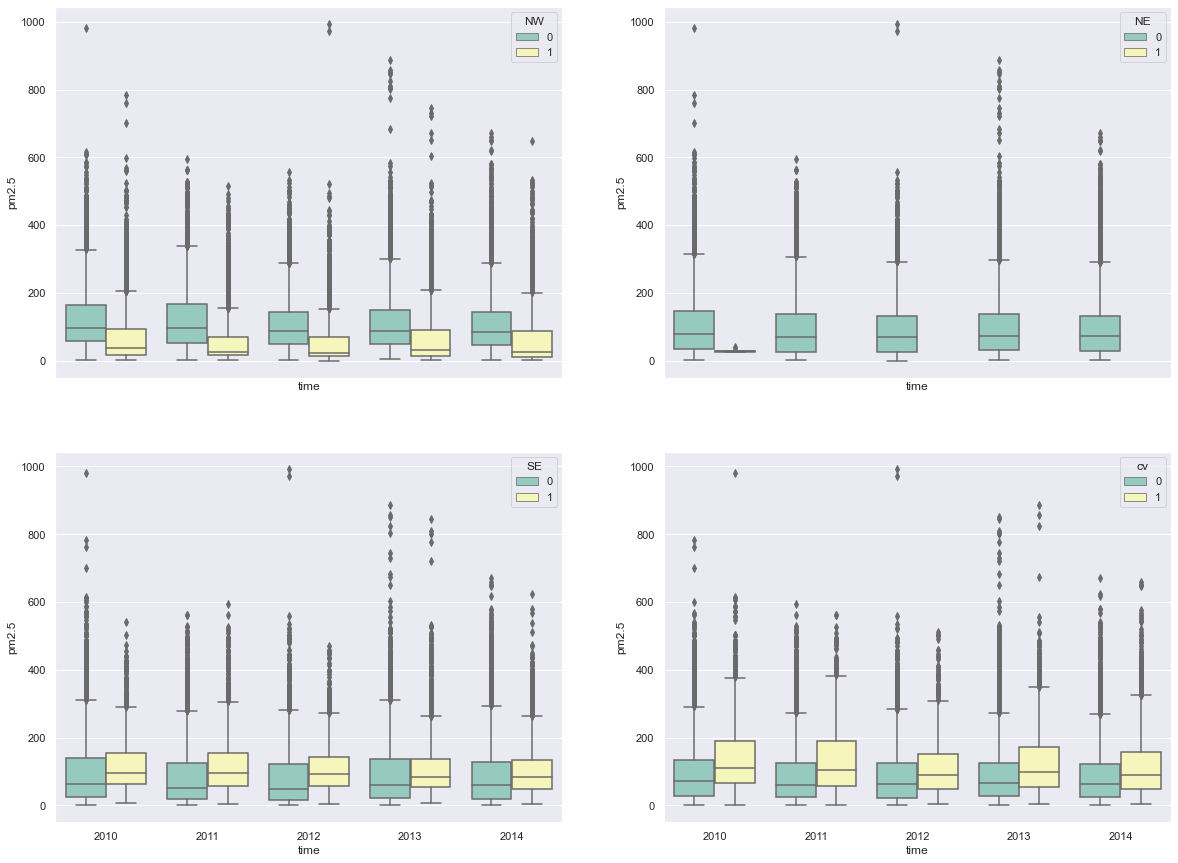

In [171]:
#POLUAREA IN FCT. DACA BATE SAU NU VATUL DIN FIECARE DIRECTIE LUATA PE RAND
f, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True)
sns.boxplot(x=df_B1["time"].dt.year, y="pm2.5", hue='NW', data=df_B1, palette="Set3",ax=axes[0, 0])
sns.boxplot(x=df_B1["time"].dt.year, y="pm2.5", hue='NE', data=df_B1, palette="Set3",ax=axes[0, 1])
sns.boxplot(x=df_B1["time"].dt.year, y="pm2.5", hue='SE', data=df_B1, palette="Set3",ax=axes[1, 0])
sns.boxplot(x=df_B1["time"].dt.year, y="pm2.5", hue='cv', data=df_B1, palette="Set3",ax=axes[1, 1])